![task](TaskF.png)\
[Train](https://yadi.sk/d/IUUTPJFOfwn_OQ)\
[Test](https://yadi.sk/d/K8Z-gQbspmxkhw)

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
#import scipy.stats as st
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#import matplotlib as mpl
import librosa

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

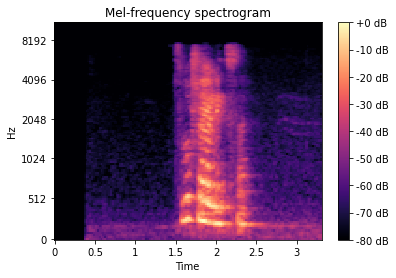

<Figure size 2304x864 with 0 Axes>

In [13]:
import librosa.display
y, sr = librosa.load("train\\5d1f7e43366513a1d0a6ec5640c3dc24.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
plt.figure(figsize = (32,12)) 
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [14]:
S.shape

(128, 143)

In [15]:
mel = np.mean(S,axis=1)
mel

array([9.02815606e-04, 1.77633099e-03, 2.47476902e-03, 5.03289374e-03,
       9.16875154e-03, 1.13934847e-02, 1.23128265e-01, 1.63549376e+00,
       2.07836652e+00, 2.38697886e+00, 4.64955628e-01, 5.97616285e-02,
       1.16962381e-01, 8.34708363e-02, 3.50629836e-02, 2.85717934e-01,
       8.15726519e-01, 6.71992064e-01, 4.70407814e-01, 2.65294194e-01,
       4.08693105e-01, 2.11163014e-01, 3.03930137e-02, 3.05372886e-02,
       2.30649281e-02, 7.41619393e-02, 2.71539688e-01, 5.28266013e-01,
       4.56788599e-01, 8.25191438e-02, 3.08458321e-02, 2.10955217e-02,
       6.46642270e-03, 7.55743124e-03, 2.73987036e-02, 5.75888306e-02,
       4.19332199e-02, 3.78165245e-02, 1.67796053e-02, 5.43582486e-03,
       1.59328722e-03, 4.12049377e-03, 2.19784817e-03, 3.92637774e-03,
       6.70693442e-03, 6.34935126e-03, 4.19018790e-03, 1.32141204e-03,
       3.76122561e-03, 7.56006734e-03, 1.57184582e-02, 1.27905775e-02,
       1.60988588e-02, 7.36628613e-03, 4.06409614e-03, 3.89288389e-03,
      

In [16]:
mel.shape

(128,)

In [17]:
mel

array([9.02815606e-04, 1.77633099e-03, 2.47476902e-03, 5.03289374e-03,
       9.16875154e-03, 1.13934847e-02, 1.23128265e-01, 1.63549376e+00,
       2.07836652e+00, 2.38697886e+00, 4.64955628e-01, 5.97616285e-02,
       1.16962381e-01, 8.34708363e-02, 3.50629836e-02, 2.85717934e-01,
       8.15726519e-01, 6.71992064e-01, 4.70407814e-01, 2.65294194e-01,
       4.08693105e-01, 2.11163014e-01, 3.03930137e-02, 3.05372886e-02,
       2.30649281e-02, 7.41619393e-02, 2.71539688e-01, 5.28266013e-01,
       4.56788599e-01, 8.25191438e-02, 3.08458321e-02, 2.10955217e-02,
       6.46642270e-03, 7.55743124e-03, 2.73987036e-02, 5.75888306e-02,
       4.19332199e-02, 3.78165245e-02, 1.67796053e-02, 5.43582486e-03,
       1.59328722e-03, 4.12049377e-03, 2.19784817e-03, 3.92637774e-03,
       6.70693442e-03, 6.34935126e-03, 4.19018790e-03, 1.32141204e-03,
       3.76122561e-03, 7.56006734e-03, 1.57184582e-02, 1.27905775e-02,
       1.60988588e-02, 7.36628613e-03, 4.06409614e-03, 3.89288389e-03,
      

In [18]:
df = pd.read_table('targets.tsv',names=['file','gender'])
df['file'] = pd.Series(map(lambda x:x+'.wav',df['file']))
df


,file,gender
0,5d1f7e43366513a1d0a6ec5640c3dc24.wav,1
1,9a701a4536a05b6610a590a9fe702ed8.wav,1
2,cad0b8547008d1524c1a0e5fd51f9908.wav,1
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav,0
4,30fb32cba90b34af26f3f14f5d636805.wav,0
...,...,...
13931,215443bcce2003d58d7dc6cd53af73ed.wav,1
13932,d26e5ebee3589530a4ec735ba1baab83.wav,0
13933,b9ae9428d4d7d279068aea06365d5736.wav,1
13934,3da22010bcdd5b47d7f2d3ceea190195.wav,0


In [19]:
target = dict(zip(df['file'],df['gender']))
target

{'5d1f7e43366513a1d0a6ec5640c3dc24.wav': 1,
 '9a701a4536a05b6610a590a9fe702ed8.wav': 1,
 'cad0b8547008d1524c1a0e5fd51f9908.wav': 1,
 '4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav': 0,
 '30fb32cba90b34af26f3f14f5d636805.wav': 0,
 'fa33445afe71a6dc18e4881c053da5be.wav': 0,
 '2f1a399df5f41cf3730253d07d7756ae.wav': 0,
 'cfb6bb7aa22ae864c2f3e08047b2cd3a.wav': 0,
 '8de1d8568032a2c5fa8301313b5487bc.wav': 1,
 '072aec7c0d3ed87387a310fd7c88f9a4.wav': 0,
 '9ac84ceb21b973a97a42a0a2871da2a4.wav': 1,
 '5c8ad64dd55b682d0e7e10e57d3bdaff.wav': 1,
 '11622347865947d971e527e3d971f2f9.wav': 1,
 '3ac8078b6e2ca534ddc1062d94f7cfcf.wav': 0,
 '4d261acb44afb98432f66578aea1bf1f.wav': 0,
 '37961a381e9df505afdc1bd2c3483e1c.wav': 0,
 '08a0aedcf23f974821c45584dc21d87e.wav': 0,
 '466c0650924bda57206d6ca075b1b4ea.wav': 0,
 'cbab9d2664d77a32093ecc21f44bf893.wav': 1,
 'c39fd30a3ec8d5de205880fd6461dc78.wav': 1,
 '6cf7304f4583eb61fd5b9ed43193bf6d.wav': 0,
 'e7550c48fbb1ee35b0de05c0248dc30e.wav': 0,
 'c135e2d9601e8daf705458b9eabc8f

In [20]:
# X = pd.DataFrame()
# for file in df['file']:
#     y, sr = librosa.load('train/'+file)
#     S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
#     mel = np.mean(S,axis=1)
#     X = X.append(pd.Series(mel,name=file))

In [22]:
#X.to_csv('features_train.csv')

X = pd.read_csv('features_train.csv', index_col=0)

In [23]:
df = df.join(X, on='file')

In [24]:
df

,file,gender,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,5d1f7e43366513a1d0a6ec5640c3dc24.wav,1,0.000903,0.001776,0.002475,0.005033,0.009169,0.011393,0.123128,1.635494,...,2.795406e-11,2.579629e-11,2.407596e-11,2.272992e-11,2.163499e-11,2.075294e-11,2.006818e-11,1.953976e-11,1.917489e-11,1.894514e-11
1,9a701a4536a05b6610a590a9fe702ed8.wav,1,0.009555,0.019503,0.003606,0.003109,0.005556,0.040661,0.244778,2.220882,...,6.788568e-12,6.091850e-12,5.568982e-12,5.174599e-12,4.864894e-12,4.622094e-12,4.436614e-12,4.295390e-12,4.198655e-12,4.138591e-12
2,cad0b8547008d1524c1a0e5fd51f9908.wav,1,0.001953,0.003955,0.004948,0.012576,0.018972,0.015008,0.237282,8.192163,...,7.272714e-10,6.673495e-10,6.205593e-10,5.844563e-10,5.554345e-10,5.322375e-10,5.143404e-10,5.005954e-10,4.911327e-10,4.851836e-10
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav,0,0.002453,0.005082,0.019799,1.360138,9.252398,1.840539,0.158951,0.254636,...,9.189501e-11,8.592169e-11,8.110376e-11,7.732459e-11,7.422186e-11,7.169766e-11,6.973643e-11,6.821309e-11,6.715987e-11,6.649086e-11
4,30fb32cba90b34af26f3f14f5d636805.wav,0,0.000728,0.001982,0.013747,0.266320,2.120035,0.573021,0.095892,0.253706,...,1.920331e-11,1.748421e-11,1.616753e-11,1.516503e-11,1.436908e-11,1.373891e-11,1.325605e-11,1.288772e-11,1.263422e-11,1.247561e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13931,215443bcce2003d58d7dc6cd53af73ed.wav,1,0.002440,0.008428,0.008204,0.025592,0.010800,0.013847,0.137684,0.389274,...,7.648851e-12,6.827097e-12,6.195090e-12,5.711534e-12,5.329216e-12,5.027890e-12,4.797916e-12,4.622108e-12,4.501726e-12,4.427319e-12
13932,d26e5ebee3589530a4ec735ba1baab83.wav,0,0.002644,0.005374,2.369254,4.812565,0.372083,0.212869,1.986582,1.323825,...,1.365465e-10,1.271101e-10,1.195737e-10,1.136866e-10,1.088796e-10,1.049867e-10,1.019638e-10,9.962135e-11,9.800580e-11,9.697842e-11
13933,b9ae9428d4d7d279068aea06365d5736.wav,1,0.009591,0.014776,0.004110,0.001738,0.001810,0.004867,0.023682,0.592101,...,5.645556e-11,5.180028e-11,4.816162e-11,4.535146e-11,4.309193e-11,4.128618e-11,3.989273e-11,3.882299e-11,3.808634e-11,3.762258e-11
13934,3da22010bcdd5b47d7f2d3ceea190195.wav,0,0.005548,0.006359,0.196564,2.043717,0.745429,0.075567,0.332790,2.391929,...,2.183123e-13,1.961992e-13,1.816204e-13,1.712719e-13,1.637374e-13,1.581564e-13,1.533462e-13,1.500870e-13,1.475468e-13,1.461179e-13


In [25]:
X = df.drop(['file','gender'],axis=1)
y = df['gender']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
clf = GradientBoostingClassifier(n_estimators=150)
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [28]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9586681974741676

In [29]:
clf.fit(X,y)

GradientBoostingClassifier(n_estimators=150)

In [ ]:
# from os import listdir

# X_pred = pd.DataFrame()
# for file in listdir('test'):
#     y, sr = librosa.load('test/'+file)
#     S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
#     mel = np.mean(S,axis=1)
#     X_pred = X_pred.append(pd.Series(mel,name=file))
    
# X_pred.to_csv('features_test.csv')

In [33]:
X_pred = pd.read_csv('features_test.csv',index_col=0)
X_pred

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
00100026dbdffcd01cde6ee9b9a9d273.wav,0.003179,0.003681,0.001619,0.005819,0.009863,0.008366,0.047997,0.236967,0.206788,1.516146,...,2.858578e-11,2.597990e-11,2.396289e-11,2.241366e-11,2.117637e-11,2.019311e-11,1.943840e-11,1.886304e-11,1.846550e-11,1.821750e-11
0014278276a6cc05fe8c522af0a677df.wav,0.006079,0.007069,0.001400,0.002232,0.001304,0.004944,0.082611,1.294596,0.668409,0.035735,...,1.736557e-10,1.632925e-10,1.547405e-10,1.479284e-10,1.422617e-10,1.376117e-10,1.339704e-10,1.311217e-10,1.291525e-10,1.278919e-10
0026e20266ceba9cdda2c116e89d2f3b.wav,0.003195,0.005485,0.004219,0.006511,0.006889,0.014226,0.058211,0.254833,1.839943,2.111620,...,1.061559e-11,9.667544e-12,8.930566e-12,8.362566e-12,7.907552e-12,7.544711e-12,7.264299e-12,7.050239e-12,6.902231e-12,6.809499e-12
008b37fc832d3dfad9105961c5801c02.wav,0.001090,0.002102,0.001342,0.003385,0.003624,0.002511,0.061399,1.135923,0.713136,0.156457,...,3.376829e-11,3.199179e-11,3.049457e-11,2.928919e-11,2.827415e-11,2.743361e-11,2.677251e-11,2.625164e-11,2.589135e-11,2.565897e-11
00b1d7d0d6fdb25050041f6e2ae2871e.wav,0.002174,0.007216,0.012816,0.103011,0.637678,0.106470,0.020286,0.149535,0.864947,1.097607,...,1.107909e-09,1.034460e-09,9.751736e-10,9.285536e-10,8.902568e-10,8.591278e-10,8.348846e-10,8.160363e-10,8.030306e-10,7.947469e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbea6a332d113f0bd16cf0b4ed07dc6.wav,0.001853,0.001492,0.001546,0.004584,0.009350,0.145634,0.360745,3.977857,2.086797,0.067936,...,2.594315e-10,2.398800e-10,2.243537e-10,2.122538e-10,2.024271e-10,1.945117e-10,1.883782e-10,1.836440e-10,1.803797e-10,1.783181e-10
ffee25334e0247dd07d80d0eb3ce7886.wav,0.002130,0.004249,0.055357,1.813417,8.212984,22.539303,3.167810,0.263255,1.280061,1.998335,...,2.272843e-10,2.121770e-10,1.999584e-10,1.903453e-10,1.824478e-10,1.760310e-10,1.710317e-10,1.671495e-10,1.644708e-10,1.627637e-10
fff86627949b37d236237ff895ff4268.wav,0.000890,0.000665,0.000523,0.013528,0.013444,0.013102,0.149911,0.414769,0.618967,1.347437,...,4.528460e-13,3.908007e-13,3.451432e-13,3.111210e-13,2.845500e-13,2.643894e-13,2.500724e-13,2.386097e-13,2.303605e-13,2.250131e-13
fff8aa9bac38e85734f64aad2b2f3814.wav,0.002749,0.002706,0.068056,0.198192,0.024774,0.054186,0.453246,0.354940,0.044305,0.263300,...,1.134834e-11,1.045050e-11,9.740678e-12,9.187724e-12,8.740106e-12,8.380326e-12,8.101552e-12,7.886642e-12,7.738297e-12,7.644991e-12


In [40]:
index = pd.Index(map(lambda x: x.split('.')[0], X_pred.index))

In [41]:
y_pred = clf.predict(X_pred)
pd.DataFrame(y_pred,index=index).to_csv('answers.tsv',header=None,sep='\t')